In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium

In [2]:
df=pd.read_csv('student-dataset.csv')
df.head(5)

,id,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
0,0,Kiana Lor,China,Suzhou,31.31,120.62,F,NaN,22,3.5,3.7,3.1,1.0,4,4.0,4
1,1,Joshua Lonaker,United States of America,Santa Clarita,34.39,-118.54,M,NaN,22,2.9,3.2,3.6,5.0,5,4.0,5
2,2,Dakota Blanco,United States of America,Oakland,37.80,-122.27,F,NaN,22,3.9,3.8,3.2,5.0,3,3.0,4
3,3,Natasha Yarusso,United States of America,Castro Valley,37.69,-122.09,F,NaN,20,3.3,2.8,3.2,5.0,5,2.0,4
4,4,Brooke Cazares,Brazil,São José dos Campos,-23.18,-45.88,F,NaN,21,3.7,2.6,3.4,1.0,4,4.0,5


In [3]:
df.tail(5)

,id,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
302,302,Austin Haas,United States of America,Columbus,39.96,-83.00,M,NaN,20,3.6,3.7,3.1,5.0,4,5.0,5
303,303,Madison Fithian,United States of America,Los Angeles,34.05,-118.24,F,NaN,20,3.6,3.9,4.0,5.0,5,5.0,3
304,304,Zachary Mulvahill,United States of America,Los Angeles,34.05,-118.24,M,NaN,20,3.2,3.4,3.9,5.0,5,5.0,3
305,305,Eliana Michelsen,United States of America,Oakland,37.80,-122.27,F,NaN,23,3.0,2.8,2.9,5.0,4,4.0,5
306,306,Dane Whittemore,Canada,Toronto,43.67,-79.42,M,NaN,21,3.8,3.2,4.0,5.0,5,4.0,5


In [4]:
df.drop('id',axis=1,inplace= True)
df.head(5)
df.tail(5)

,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
302,Austin Haas,United States of America,Columbus,39.96,-83.00,M,NaN,20,3.6,3.7,3.1,5.0,4,5.0,5
303,Madison Fithian,United States of America,Los Angeles,34.05,-118.24,F,NaN,20,3.6,3.9,4.0,5.0,5,5.0,3
304,Zachary Mulvahill,United States of America,Los Angeles,34.05,-118.24,M,NaN,20,3.2,3.4,3.9,5.0,5,5.0,3
305,Eliana Michelsen,United States of America,Oakland,37.80,-122.27,F,NaN,23,3.0,2.8,2.9,5.0,4,4.0,5
306,Dane Whittemore,Canada,Toronto,43.67,-79.42,M,NaN,21,3.8,3.2,4.0,5.0,5,4.0,5


In [5]:
df.shape

(307, 15)

In [6]:
df.isna().sum()

name                    0
nationality             0
city                    0
latitude                0
longitude               0
gender                  0
ethnic.group          307
age                     0
english.grade           0
math.grade              0
sciences.grade          0
language.grade          0
portfolio.rating        0
coverletter.rating      0
refletter.rating        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['name', 'nationality', 'city', 'latitude', 'longitude', 'gender',
       'ethnic.group', 'age', 'english.grade', 'math.grade', 'sciences.grade',
       'language.grade', 'portfolio.rating', 'coverletter.rating',
       'refletter.rating'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                307 non-null    object 
 1   nationality         307 non-null    object 
 2   city                307 non-null    object 
 3   latitude            307 non-null    float64
 4   longitude           307 non-null    float64
 5   gender              307 non-null    object 
 6   ethnic.group        0 non-null      float64
 7   age                 307 non-null    int64  
 8   english.grade       307 non-null    float64
 9   math.grade          307 non-null    float64
 10  sciences.grade      307 non-null    float64
 11  language.grade      307 non-null    float64
 12  portfolio.rating    307 non-null    int64  
 13  coverletter.rating  307 non-null    float64
 14  refletter.rating    307 non-null    int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 36.1+ KB

In [10]:
df.describe()

,latitude,longitude,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
count,307.000000,307.000000,0.0,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,32.863388,-64.539121,NaN,21.964169,3.369707,3.414332,3.446580,4.396417,3.986971,4.110749,4.188925
std,13.498582,81.249146,NaN,1.248013,0.538724,0.476839,0.509081,0.996474,0.928749,0.823936,0.842193
min,-33.450000,-123.130000,NaN,19.000000,1.500000,2.100000,1.400000,1.000000,1.000000,1.000000,1.000000
25%,32.720000,-118.240000,NaN,21.000000,3.100000,3.100000,3.200000,4.000000,3.500000,4.000000,4.000000
50%,34.390000,-99.140000,NaN,22.000000,3.500000,3.500000,3.600000,5.000000,4.000000,4.000000,4.000000
75%,38.960000,-73.855000,NaN,23.000000,3.800000,3.800000,3.800000,5.000000,5.000000,5.000000,5.000000
max,59.890000,139.750000,NaN,26.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
df['portfolio.rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0      4
1      5
2      3
3      5
4      4
      ..
302    4
303    5
304    5
305    4
306    5
Name: portfolio.rating, Length: 307, dtype: int64>

In [12]:
df['portfolio.rating'].values

array([4, 5, 3, 5, 4, 2, 5, 5, 4, 5, 4, 4, 4, 4, 4, 5, 2, 4, 5, 3, 4, 3,
       3, 2, 5, 3, 3, 4, 5, 5, 3, 5, 4, 4, 2, 4, 5, 5, 4, 2, 4, 5, 4, 5,
       4, 3, 3, 4, 4, 4, 5, 5, 3, 4, 3, 5, 4, 4, 5, 4, 5, 4, 2, 4, 3, 4,
       3, 4, 2, 4, 4, 5, 1, 4, 5, 5, 4, 5, 4, 2, 3, 5, 5, 4, 5, 4, 3, 4,
       3, 3, 5, 5, 4, 3, 5, 5, 4, 2, 3, 5, 4, 4, 2, 1, 3, 4, 5, 5, 5, 4,
       3, 5, 4, 4, 4, 4, 2, 3, 3, 4, 5, 4, 5, 4, 5, 4, 4, 3, 5, 4, 2, 5,
       4, 3, 2, 4, 5, 4, 3, 5, 5, 4, 4, 4, 4, 4, 5, 5, 3, 4, 3, 3, 3, 3,
       4, 4, 5, 2, 4, 5, 5, 5, 4, 4, 5, 4, 4, 5, 3, 4, 5, 4, 5, 3, 3, 4,
       4, 5, 5, 3, 4, 5, 5, 3, 3, 4, 5, 3, 3, 4, 2, 4, 5, 5, 5, 5, 5, 4,
       5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 5, 3, 4, 3, 4,
       5, 2, 4, 4, 4, 4, 3, 5, 5, 4, 4, 4, 5, 5, 5, 4, 4, 4, 2, 5, 5, 2,
       3, 4, 2, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 2, 5, 3, 4, 5, 4, 4, 5, 5,
       4, 4, 5, 4, 3, 4, 4, 4, 3, 3, 5, 4, 4, 3, 3, 4, 4, 5, 3, 5, 4, 4,
       3, 4, 4, 5, 5, 4, 4, 5, 4, 1, 3, 5, 5, 2, 3,

In [13]:
df['english.grade'].value_counts()

english.grade
3.9    49
3.7    31
3.8    29
3.4    22
3.2    20
4.0    18
3.5    17
3.3    17
3.6    16
3.1    15
3.0    12
2.8    11
2.7    11
2.4     7
2.9     7
2.3     5
2.6     5
2.1     4
2.0     3
1.7     2
2.2     2
1.9     1
1.5     1
1.8     1
2.5     1
Name: count, dtype: int64

In [14]:
df['math.grade'].value_counts

<bound method IndexOpsMixin.value_counts of 0      3.7
1      3.2
2      3.8
3      2.8
4      2.6
      ... 
302    3.7
303    3.9
304    3.4
305    2.8
306    3.2
Name: math.grade, Length: 307, dtype: float64>

In [15]:
df['sciences.grade'].value_counts

<bound method IndexOpsMixin.value_counts of 0      3.1
1      3.6
2      3.2
3      3.2
4      3.4
      ... 
302    3.1
303    4.0
304    3.9
305    2.9
306    4.0
Name: sciences.grade, Length: 307, dtype: float64>

In [16]:
df['language.grade'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1.0
1      5.0
2      5.0
3      5.0
4      1.0
      ... 
302    5.0
303    5.0
304    5.0
305    5.0
306    5.0
Name: language.grade, Length: 307, dtype: float64>

In [17]:
df['gender'].value_counts()

gender
F        152
M        151
other      4
Name: count, dtype: int64

In [18]:
df['gender'].values

array(['F', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M',
       'M', 'M', 'F', 'F', 'other', 'M', 'M', 'M', 'M', 'F', 'M', 'M',
       'F', 'F', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F',
       'M', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M',
       'F', 'M', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'M', 'F',
       'F', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'M',
       'M', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F',
       'M', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'F',
       'M', 'other', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'F',
       'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'M',
       'F', 'M', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'F',
       'M', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
       'F', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M',
       'F', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'M',

In [19]:
df['gender'] = df['gender'].map({'M':1,'F':0})
df.head(3)

,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
0,Kiana Lor,China,Suzhou,31.31,120.62,0.0,NaN,22,3.5,3.7,3.1,1.0,4,4.0,4
1,Joshua Lonaker,United States of America,Santa Clarita,34.39,-118.54,1.0,NaN,22,2.9,3.2,3.6,5.0,5,4.0,5
2,Dakota Blanco,United States of America,Oakland,37.80,-122.27,0.0,NaN,22,3.9,3.8,3.2,5.0,3,3.0,4


In [20]:
df.tail(3)

,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
304,Zachary Mulvahill,United States of America,Los Angeles,34.05,-118.24,1.0,NaN,20,3.2,3.4,3.9,5.0,5,5.0,3
305,Eliana Michelsen,United States of America,Oakland,37.80,-122.27,0.0,NaN,23,3.0,2.8,2.9,5.0,4,4.0,5
306,Dane Whittemore,Canada,Toronto,43.67,-79.42,1.0,NaN,21,3.8,3.2,4.0,5.0,5,4.0,5


In [21]:
df.describe()

,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
count,307.000000,307.000000,303.000000,0.0,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,32.863388,-64.539121,0.498350,NaN,21.964169,3.369707,3.414332,3.446580,4.396417,3.986971,4.110749,4.188925
std,13.498582,81.249146,0.500824,NaN,1.248013,0.538724,0.476839,0.509081,0.996474,0.928749,0.823936,0.842193
min,-33.450000,-123.130000,0.000000,NaN,19.000000,1.500000,2.100000,1.400000,1.000000,1.000000,1.000000,1.000000
25%,32.720000,-118.240000,0.000000,NaN,21.000000,3.100000,3.100000,3.200000,4.000000,3.500000,4.000000,4.000000
50%,34.390000,-99.140000,0.000000,NaN,22.000000,3.500000,3.500000,3.600000,5.000000,4.000000,4.000000,4.000000
75%,38.960000,-73.855000,1.000000,NaN,23.000000,3.800000,3.800000,3.800000,5.000000,5.000000,5.000000,5.000000
max,59.890000,139.750000,1.000000,NaN,26.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000


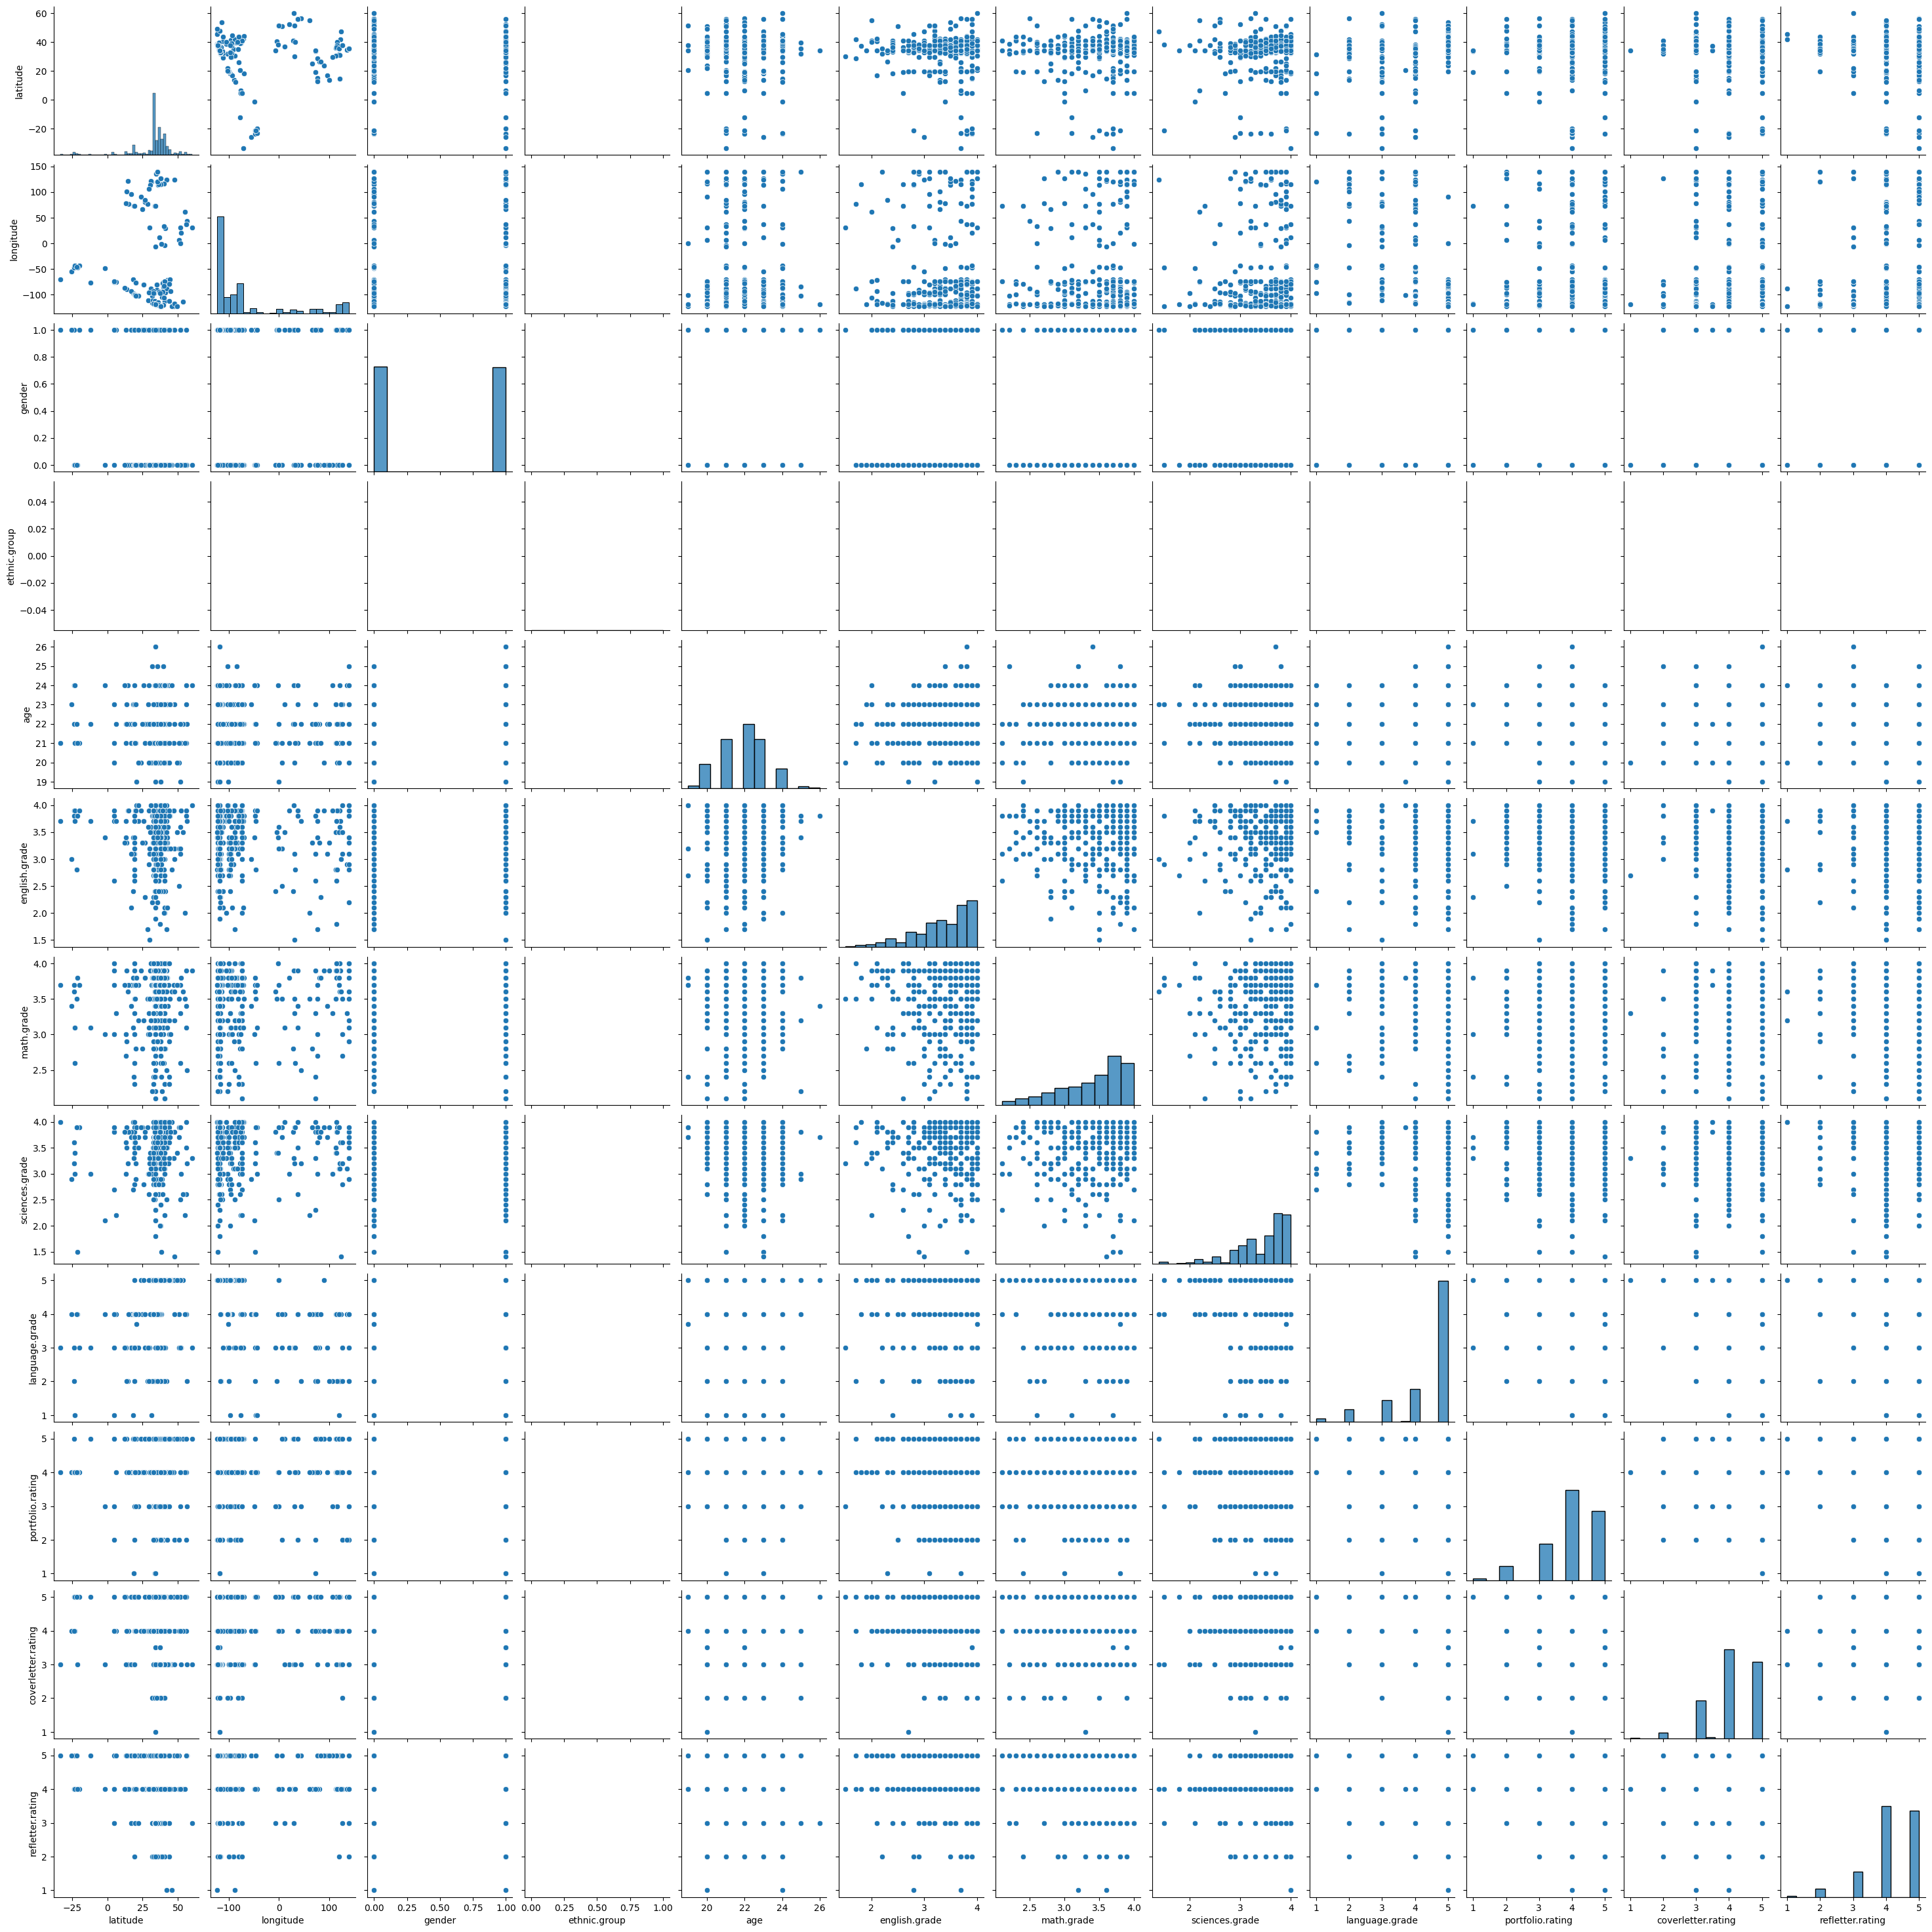

In [22]:
sns.pairplot(data = df)

/tmp/ipykernel_8653/751845205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['portfolio.rating'])


<Axes: xlabel='portfolio.rating', ylabel='Density'>

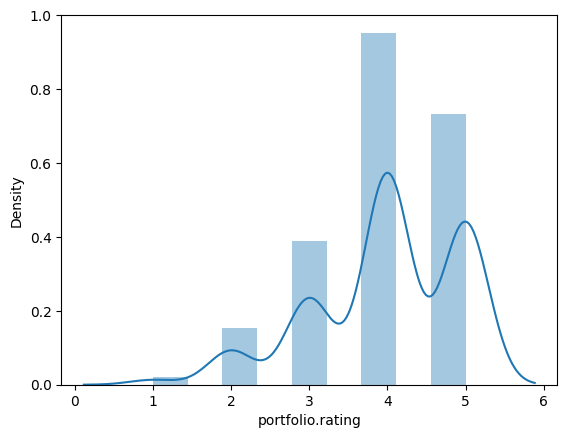

In [23]:
sns.distplot(df['portfolio.rating'])

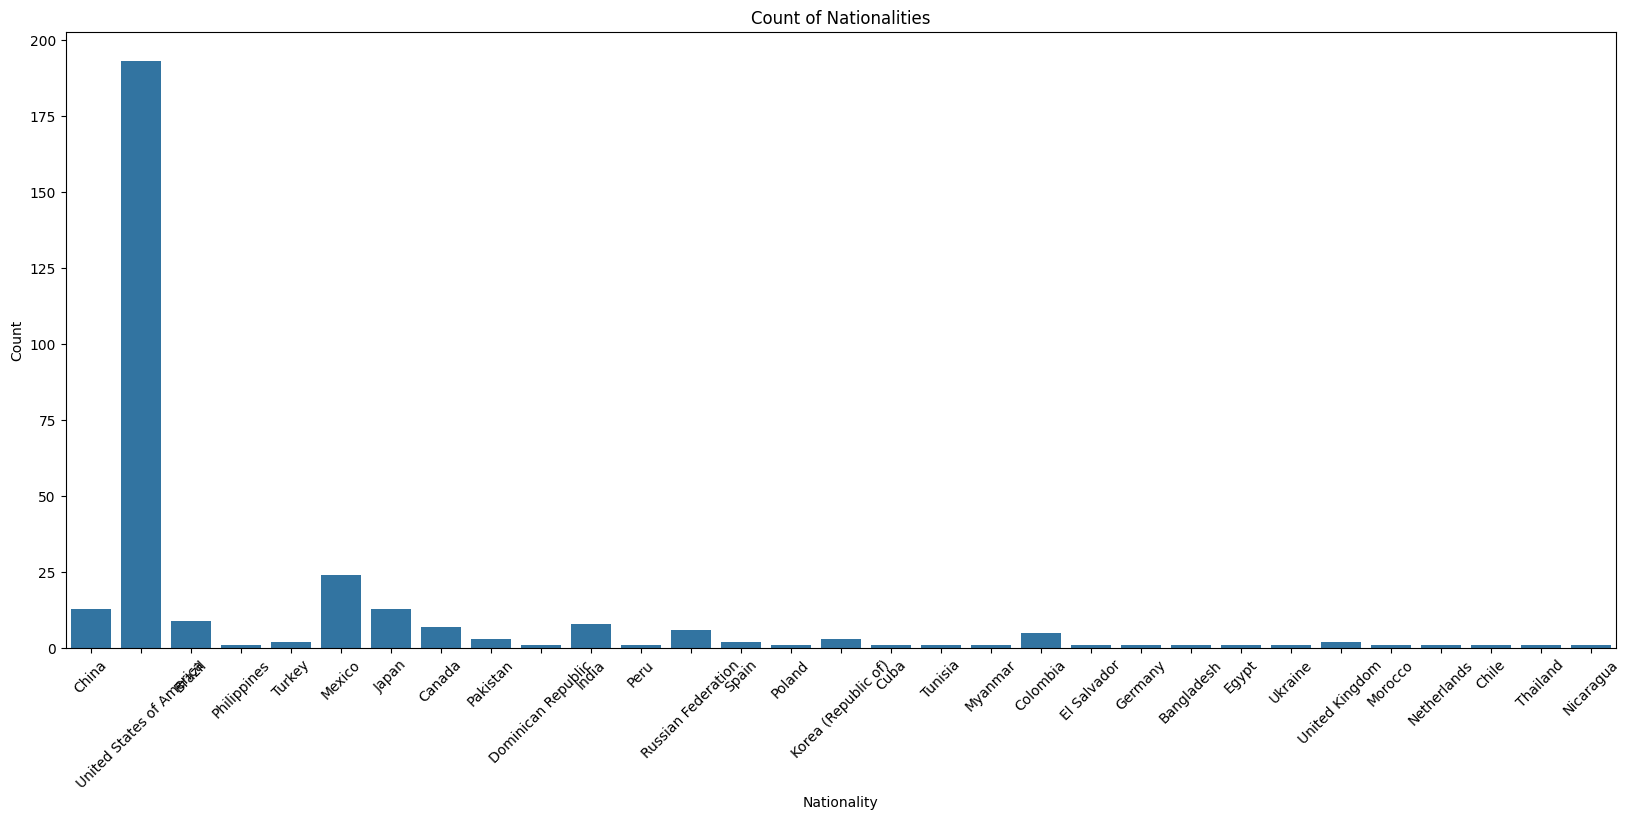

In [24]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='nationality')
plt.title('Count of Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

<Axes: xlabel='gender', ylabel='count'>

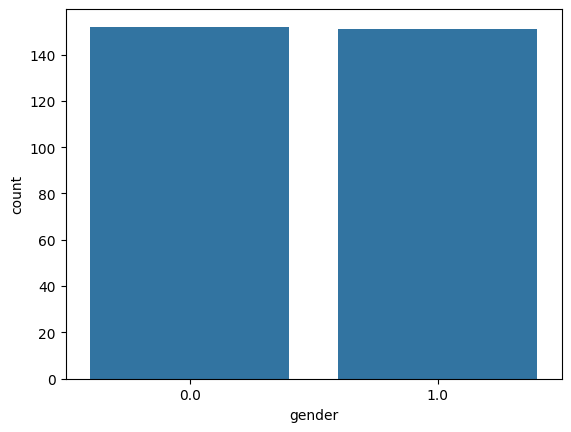

In [25]:
sns.countplot(x = 'gender',data = df)

In [26]:
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=16)
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"{row['city']}, {row['nationality']}",
        color='blue',  
        fill=True,
        fill_color='blue'  
    ).add_to(m)


In [27]:
m